# Penguins
This notebook is my attempt to analyze penguins dataset.

In [78]:
# Data Frames.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Loading

In [80]:
#Loading the Penguins dataset.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")


In [81]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [82]:
# Information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Cleaning dataset

In [83]:
# Checking missing values
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [84]:
# Removing missing values
df.dropna(axis=0, inplace=True)

In [85]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [86]:
# Checking multiple values
df.duplicated()

0      False
1      False
2      False
4      False
5      False
       ...  
338    False
340    False
341    False
342    False
343    False
Length: 333, dtype: bool

No duplicate values. Now, I will be work with dateset with only 333 rows.

In [87]:
# Correcting index
df.reset_index(drop=True)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Describing dataset

##### Counts

In [145]:
count1=df['species'].value_counts()
count2=df['island'].value_counts()
count3=df['sex'].value_counts()
print(count1,count2,count3)


species
0    146
2    119
1     68
Name: count, dtype: int64 island
0    163
1    123
2     47
Name: count, dtype: int64 sex
1    168
0    165
Name: count, dtype: int64


This dataset is not balanced, containing various counts of values for variables as it came from field ecological research.

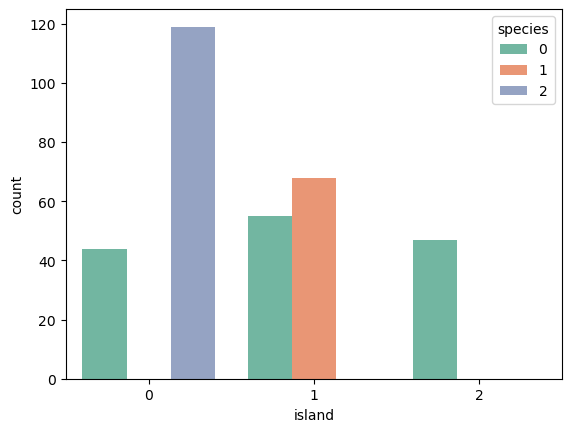

In [152]:
with sns.color_palette("Set2"):
    sns.countplot(df, x='island', hue='species')

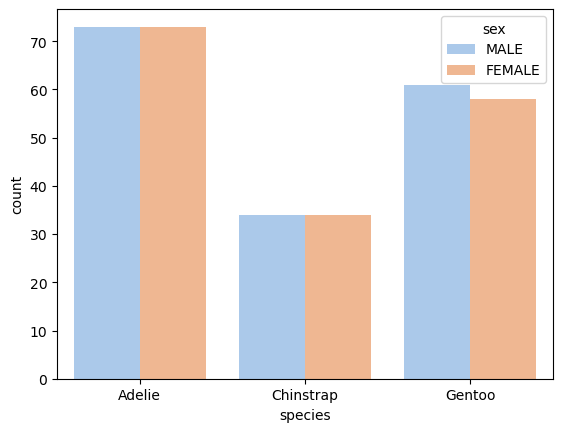

In [110]:
with sns.color_palette('pastel'):
    sns.countplot(df, x='species', hue='sex')

##### Histograms of morfological values

<Axes: xlabel='body_mass_g', ylabel='Count'>

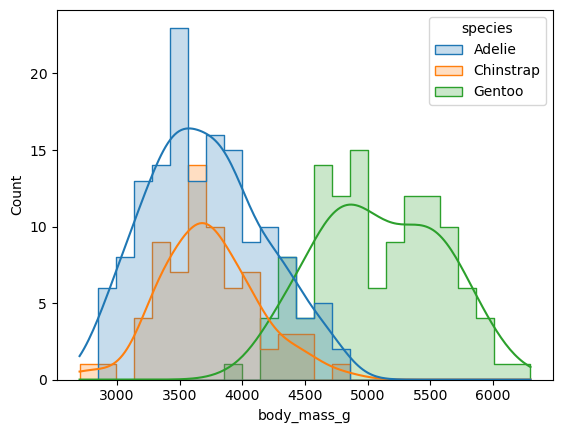

In [128]:
sns.histplot(data=df, x='body_mass_g', hue='species', element='step', kde=True, bins=25, )

Gentoo penguins are heavier then Adelie penguin and Chinstrip penguins

<Axes: xlabel='bill_length_mm', ylabel='Count'>

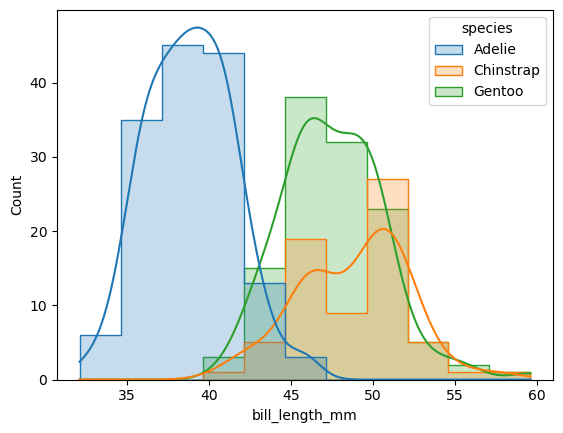

In [130]:
sns.histplot(data=df, x='bill_length_mm', hue='species', element='step', kde=True)

Adelie penguins have shorter bill than Chinstrap penguins and Gentoo penguins.

<Axes: xlabel='bill_depth_mm', ylabel='Count'>

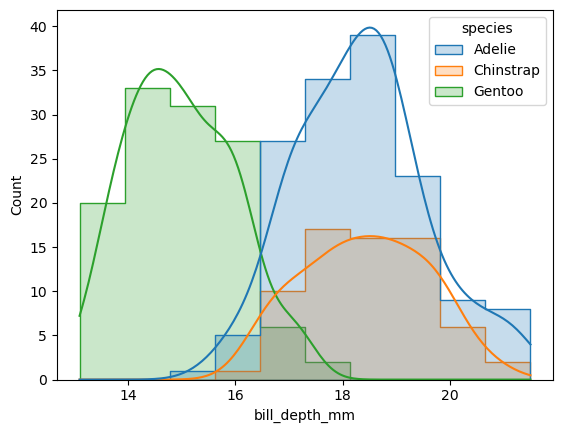

In [132]:
sns.histplot(data=df, x='bill_depth_mm', hue='species', element='step', kde=True)

Bill depth is lower with Gentoo penguins than with Adelie penguins and Chinstrap penguins.

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

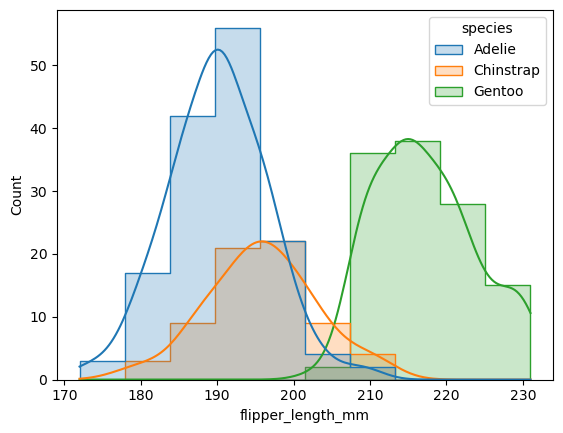

In [134]:
sns.histplot(data=df, x='flipper_length_mm', hue='species', element='step',kde=True)

##### Encoding

In [140]:
#encoding
encode=LabelEncoder()
df.species=encode.fit_transform(df.species)
df.island=encode.fit_transform(df.island)
df.sex=encode.fit_transform(df.sex)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int32  
 1   island             333 non-null    int32  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int32  
dtypes: float64(4), int32(3)
memory usage: 16.9 KB


Now, Adelie has code 0, Chinstrap 1, Gentoo 2, male 0, female 1, island Torgensen 2, Dream island 1, Bisco 0. Datatype was change from object to integer. This change can help me to make correlation analysis of whole dataset, as correlation coefficient can be count with numbers (integers, floats), only.

##### Correlation

<Axes: >

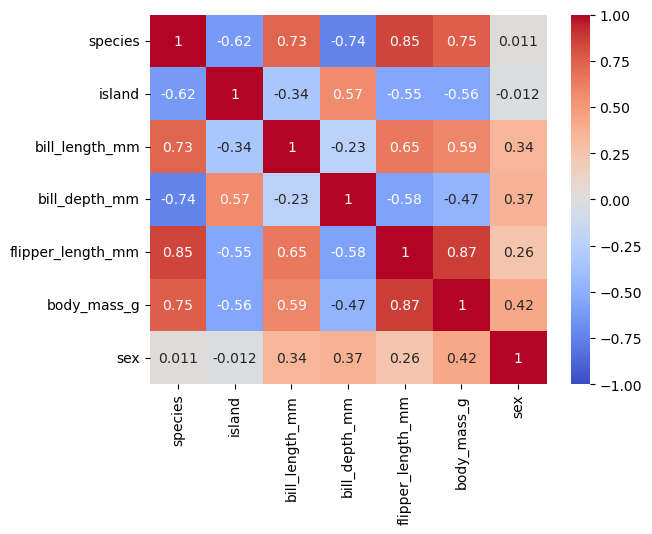

In [141]:
# Default value of parameter method of corr() function is 'pearson'
corr_coef=df.corr()
sns.heatmap(corr_coef, annot=True, cmap='coolwarm', vmin=-1,vmax=1)

Results between -5.9 and 5.9 indicate week correlation. Variable island and sex show only week correlation. Certain correlation is between flipper_lenght_mm and bill_lenght_mm and between flipper_lenght_mm and bodymass_g. Species is variable with correlation to any other variable.

***
### End